In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
os.getcwd()

'C:\\Users\\imadh\\Downloads'

In [18]:
data = pd.read_csv('updated_breast_cancer_data_transformed.csv')

In [19]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Stage of Cancer,Charge
0,1000025,5,1,1,1,2,1,3,1,1,1,84572.935561
1,1002945,5,4,4,5,7,10,3,2,1,3,132537.676589
2,1015425,3,1,1,1,2,2,3,1,1,1,83790.378723
3,1016277,6,8,8,1,3,4,3,7,1,3,133059.521055
4,1017023,4,1,1,3,2,1,3,1,1,1,84170.762690


In [20]:
print("les diemsions de la BDD : ", data.shape)
print("\n\nla liste des variables : \n", data.columns) 
print("\n\nles types de variables : \n", data.dtypes)

les diemsions de la BDD :  (699, 12)


la liste des variables : 
 Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Stage of Cancer', 'Charge'],
      dtype='object')


les types de variables : 
 Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Stage of Cancer                  int64
Charge                         float64
dtype: object


In [21]:
data = data.drop('Sample code number', axis=1)

In [22]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Stage of Cancer,Charge
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,1.925608,107419.887942
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,1.616592,42586.718154
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,61081.379363
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,83400.704431
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,84455.124155
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,3.000000,132904.211981
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,205574.798140


In [9]:
print(data['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [10]:
data = data.replace('?', np.nan)

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Stage of Cancer              699 non-null    int64  
 10  Charge                       699 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 60.2 KB


In [11]:
print(data.isnull().sum())

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Stage of Cancer                 0
Charge                          0
dtype: int64


In [12]:
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

In [13]:
print(data.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Stage of Cancer                0
Charge                         0
dtype: int64


In [14]:
data = data.drop('Stage of Cancer', axis=1)

<Axes: >

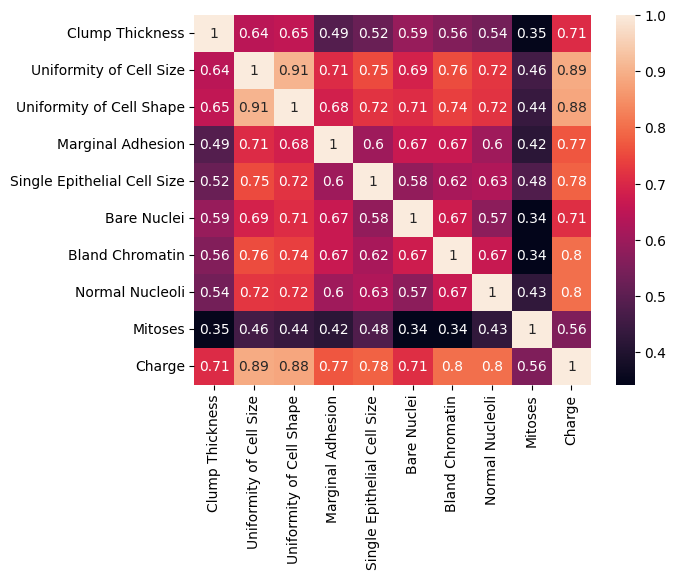

In [15]:
sns.heatmap(data.corr(),annot=True)

In [73]:
X = data.drop('Charge', axis=1)
y = data['Charge']

In [74]:
scaler_new = StandardScaler()

In [75]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {score:.4f}")

Linear Regression R^2 score: 0.9032
Ridge Regression R^2 score: 0.9032
LASSO Regression R^2 score: 0.9032
Elastic Net R^2 score: 0.9087
Random Forest R^2 score: 0.9094


In [77]:
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler_new.fit_transform(X_train)
X_test_scaled = scaler_new.transform(X_test)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Define the ElasticNet model
elastic_net = ElasticNet()

# Create a wider parameter grid for ElasticNet
param_grid = {
    'alpha': np.logspace(-10, 10, 100),  # Wider range of alpha values
    'l1_ratio': np.linspace(0, 1, 11),  # Mix of Lasso (1) and Ridge (0)
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)  # Use all available cores

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output best parameters and cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

# Use the best estimator to make predictions
best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test set MSE: ", mse)

# Calculate R² score
test_score = r2_score(y_test, y_pred)
print("Test Set R^2 Score:", test_score)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
Best parameters found:  {'alpha': 0.7924828983539186, 'l1_ratio': 0.9}
Best cross-validation score (MSE):  151325702.23363513
Test set MSE:  136692929.69417048
Test Set R^2 Score: 0.9080664805852825


In [80]:
# Save the best model and the scaler
joblib.dump(best_elastic_net, 'best_new.joblib')  # Save the best model
joblib.dump(scaler_new, 'scaler_new.joblib')  # Save the scaler

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


# Classification model

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


<Axes: >

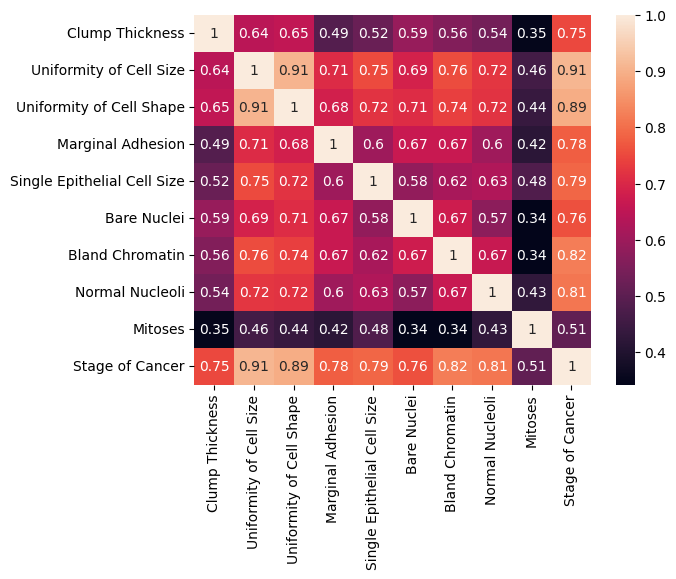

In [23]:
data = pd.read_csv('updated_breast_cancer_data_transformed.csv')
data = data.drop('Sample code number', axis=1)
print(data['Bare Nuclei'].unique())
data = data.replace('?', np.nan)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())
data = data.drop('Charge', axis=1)
sns.heatmap(data.corr(),annot=True)

In [24]:
X = data.drop('Stage of Cancer', axis=1)
y = data['Stage of Cancer']

In [27]:
stage_scaler = StandardScaler()

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = stage_scaler.fit_transform(X_train)
X_test_scaled = stage_scaler.transform(X_test)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Test the model
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.96      0.97        75
           2       0.67      0.57      0.62         7
           3       0.81      0.87      0.84        15
           4       0.82      0.56      0.67        16
           5       0.65      0.92      0.76        12

    accuracy                           0.88       140
   macro avg       0.80      0.80      0.79       140
weighted avg       0.88      0.88      0.88       140



In [35]:
# Save the model
joblib.dump(clf, 'stage_model.joblib')

# Save the scaler
joblib.dump(stage_scaler, 'stage_scaler.joblib')

['stage_scaler.joblib']